In [1]:
import pathlib

import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%run ../../scripts/plotting_helper.py
from matplotlib import pyplot as plt

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
output_dir = "../../figures/figure_luminex"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg"]
filetype = "svg"
sc.settings.figdir = output_dir
sc.set_figure_params(format=filetype, transparent=True)
sc.set_figure_params(dpi_save=150, figsize=(2.5, 2.5))


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)

plt.style.use("../../scripts/paper_umap.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]

In [2]:
sample_name_dict = {"Supplement + Media":"S1",
"Supplement + Media (duplicate)":"S2",
"Media":"S3",
"Day 4 SN":"S4",
"Day 8 SN":"S5",
"Measles_Res":"S6", "PBS":"PBS"}

inv_map = {v: k for k, v in sample_name_dict.items()}

# load the data
df1 = pd.read_excel("/home/michaelswift/Downloads/Q3837-H76-H80Panel1-1.xlsm", sheet_name="RAW MFI")
df2 = pd.read_excel("/home/michaelswift/Downloads/Q3837-H76-H80Panel2-1.xlsm", sheet_name="RAW MFI")
df3 = pd.read_excel("/home/michaelswift/Downloads/Q3837-H76-H80Panel3-1.xlsm", sheet_name="RAW MFI")

# munge the data
df = pd.concat([df1, df2, df3], axis = 1)

df.dropna(subset = "Name", inplace = True)



df["sample_name"] = df.iloc[:,2]

df = df.loc[:,~df.columns.duplicated()].copy()

df = df.iloc[:,4:]

df = df[df["sample_name"].str.contains("MS-|PBS")]

df.sample_name = df['sample_name'].str.replace("MS-", "")

df.sample_name = df.sample_name.map(inv_map)

In [3]:
df = df[df.sample_name != "Measles_Res"]

## Analysis 

In [4]:
means = df.groupby('sample_name').mean()

In [5]:
normalized = df.set_index('sample_name') / means.loc["Media"]

In [6]:
# select only cytokines with FC > 5
fold_change_cutoff = 2
delta_cytokines = normalized.mean()[normalized.mean() > fold_change_cutoff].index

In [17]:
delta_cytokines

Index(['SCD40L', 'EOTAXIN/CCL11', 'FGF2/FGFB', 'FLT3L', 'GMCSF', 'IFNA2', 'IFNG', 'IL1A', 'IL2',
       'IL4', 'IL5', 'IL6', 'IL8/CXCL8', 'IL9', 'IL10', 'IL12P40', 'IL13', 'IP10/CXCL10',
       'MCP1/CCL2', 'MCP3/CCL7', 'MDC/CCL22', 'MIG/CXCL9', 'MIP1A/CCL3', 'MIP1B/CCL4',
       'RANTES/CCL5', 'TNFA', 'TNFB/LYMPHOTOXINA(LTA)', 'VEGF', 'EOTAXIN2/CCL24/MPIF2',
       'BCA1/CXCL13', 'I309/CCL1', 'IL16', 'TARC/CCL17', 'IL21', 'MIF', 'FASL', 'HGF',
       'SFAS/TNFRSF6', 'RESISTIN', 'SVCAM1', 'PAI1/SERPINE'],
      dtype='object')

In [20]:
filtered_df = normalized[delta_cytokines.to_list()]

In [8]:

filtered_df.reset_index(inplace = True)

In [9]:
filtered_df = filtered_df[filtered_df.sample_name != "Media"]

In [10]:
_d = filtered_df.melt("sample_name")

In [11]:
# combining the spin and no spin sample as they look exactly the same
_d.sample_name = _d.sample_name.str.replace(" (duplicate)", "", regex = False)

In [12]:
_d = _d.sort_values("value", ascending=False)

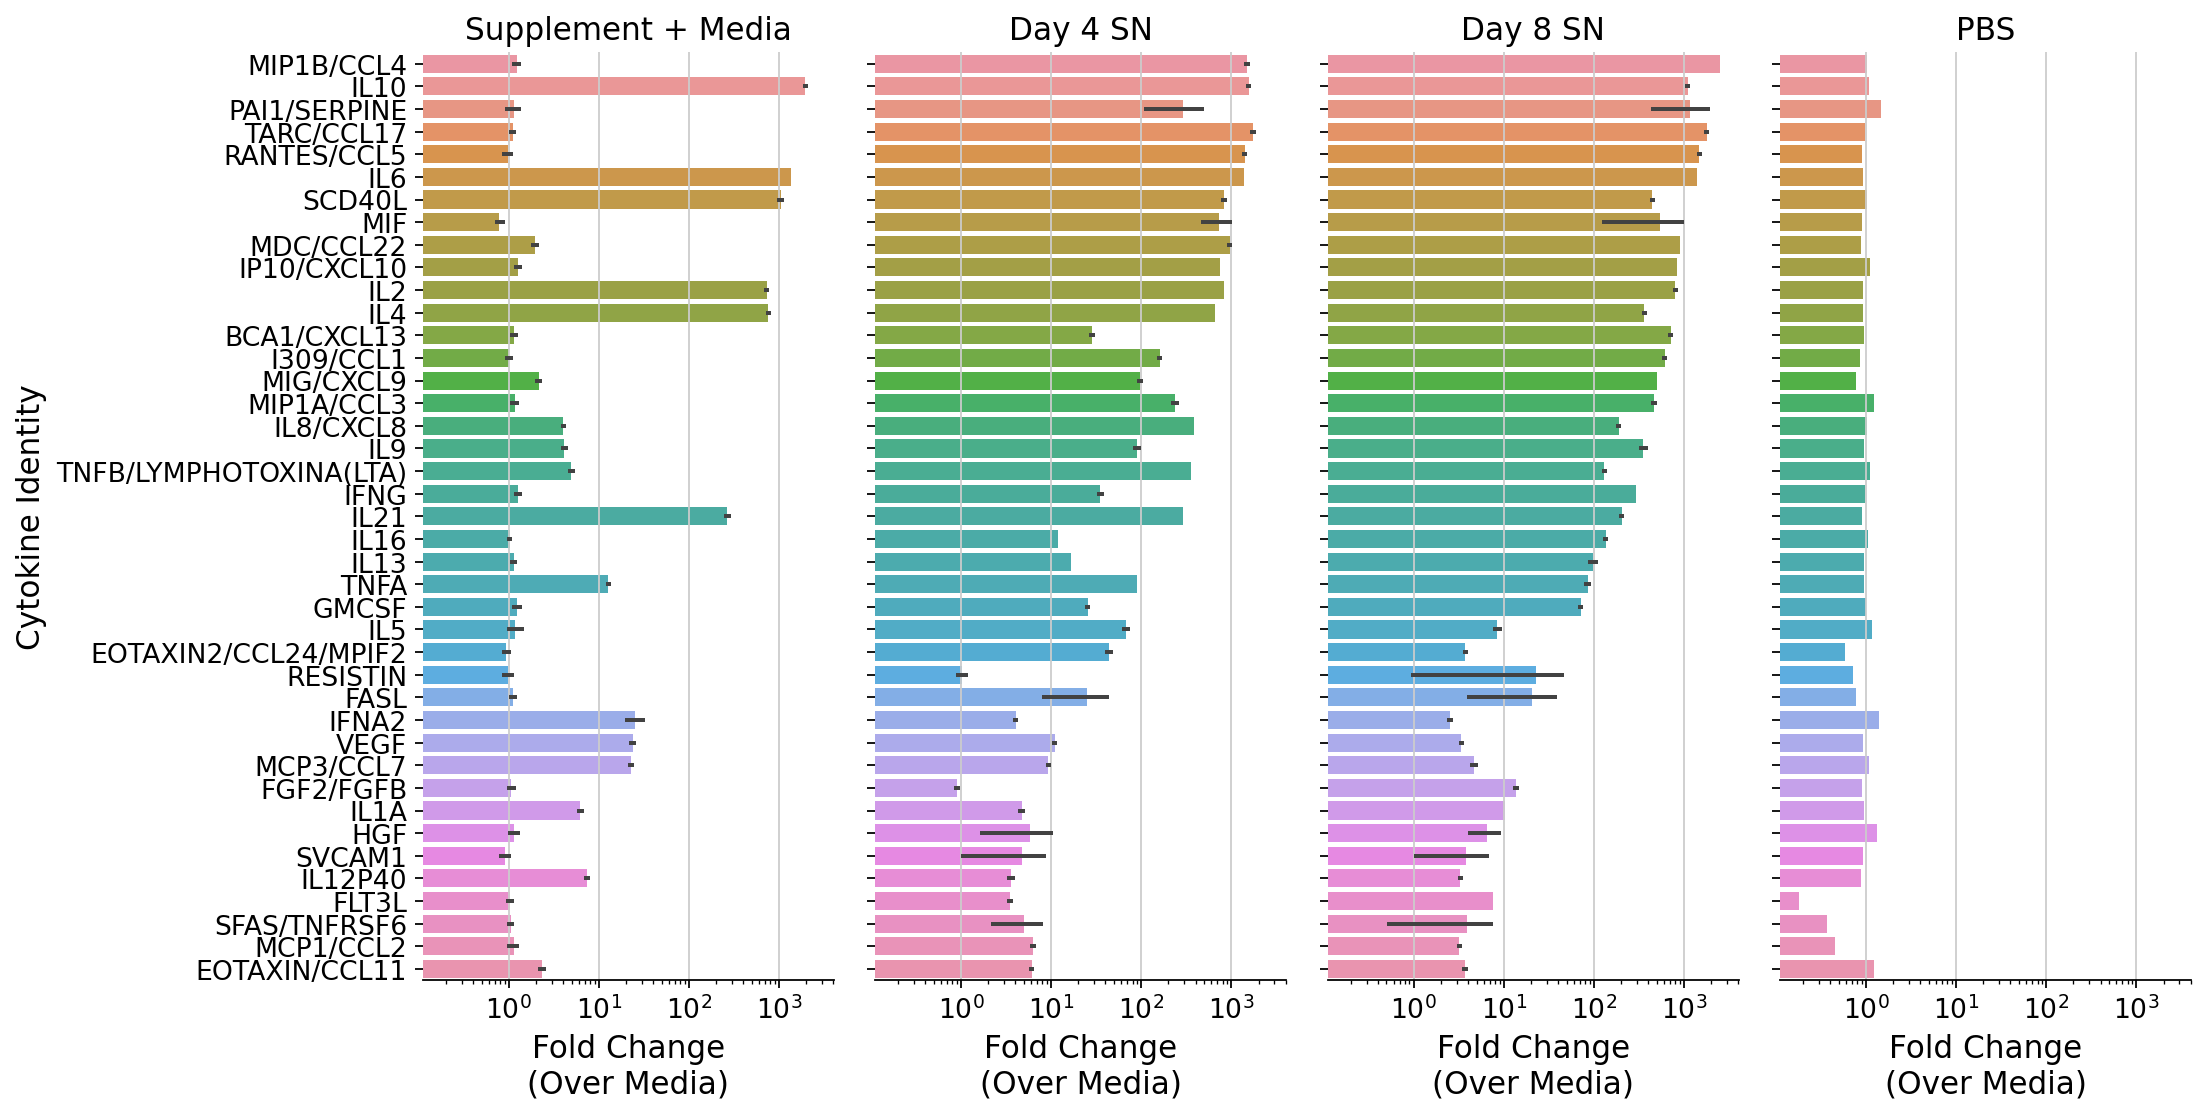

In [15]:
col_order = ["Supplement + Media", "Day 4 SN", "Day 8 SN", "PBS"]
g = sns.catplot(
    data=_d, x="value", y="variable", col="sample_name", 
    kind="bar", height=7, aspect=0.5, col_order = col_order,
log=True)
g.despine(left=True)
g.set_xlabels("Fold Change\n(Over Media)")
g.set_titles("{col_name}")
g.set_ylabels("Cytokine Identity")

In [16]:
save_figure(g.fig, "luminex_panel")

In [35]:
_d.sort_values("variable").groupby(["sample_name", "variable"]).mean().xs("Day 4 SN")

,value
variable,
BCA1/CXCL13,28.320988
EOTAXIN/CCL11,6.065217
EOTAXIN2/CCL24/MPIF2,44.009009
FASL,24.940299
FGF2/FGFB,0.897436
FLT3L,3.493103
GMCSF,25.382749
HGF,5.842105
I309/CCL1,159.957143


In [37]:
_d.sort_values("variable").groupby(["sample_name", "variable"]).mean().xs("Supplement + Media")

,value
variable,
BCA1/CXCL13,1.148148
EOTAXIN/CCL11,2.347826
EOTAXIN2/CCL24/MPIF2,0.941441
FASL,1.126866
FGF2/FGFB,1.064103
FLT3L,1.029310
GMCSF,1.227763
HGF,1.144737
I309/CCL1,1.000000


In [33]:


_d.groupby(["sample_name", "variable"]).mean() / _d.groupby(["sample_name", "variable"]).mean().xs('Supplement + Media').sort_values('variable')

value
sample_name        variable                         
Day 4 SN           BCA1/CXCL13             24.666667
                   EOTAXIN/CCL11            2.583333
                   EOTAXIN2/CCL24/MPIF2    46.746411
                   FASL                    22.132450
                   FGF2/FGFB                0.843373
...                                              ...
Supplement + Media SVCAM1                   1.000000
                   TARC/CCL17               1.000000
                   TNFA                     1.000000
                   TNFB/LYMPHOTOXINA(LTA)   1.000000
                   VEGF                     1.000000

[164 rows x 1 columns]

In [41]:

SN = _d.groupby(["sample_name", "variable"]).mean() / _d.groupby(["sample_name", "variable"]).mean().xs('Supplement + Media').sort_values('variable', ascending=False)

In [51]:
culture_secreted_cytokines = SN.xs(key = 'Day 4 SN') > 5

In [56]:
culture_secreted_cytokines[culture_secreted_cytokines['value'] == True].index.to_list()

['BCA1/CXCL13',
 'EOTAXIN2/CCL24/MPIF2',
 'FASL',
 'GMCSF',
 'HGF',
 'I309/CCL1',
 'IFNG',
 'IL13',
 'IL16',
 'IL5',
 'IL8/CXCL8',
 'IL9',
 'IP10/CXCL10',
 'MCP1/CCL2',
 'MDC/CCL22',
 'MIF',
 'MIG/CXCL9',
 'MIP1A/CCL3',
 'MIP1B/CCL4',
 'PAI1/SERPINE',
 'RANTES/CCL5',
 'SVCAM1',
 'TARC/CCL17',
 'TNFA',
 'TNFB/LYMPHOTOXINA(LTA)']

# Plot the secreted cytokines:


In [ ]:
culture_secreted_cytokines = ['CXCL13','CCL24',
 'FASLG',
 'CSF2',
 'HGF',
 'CCL1',
 'IFNG',
 'IL13',
 'IL16',
 'IL5',
 'CXCL8',
 'IL9',
 'CXCL10',
 'CCL2',
 'CCL22',
 'MIF',
 'CXCL9',
 'CCL3',
 'CCL4',
 'SERPINE1',
 'CCL5',
 'VCAM1',
 'CCL17',
 'TNF',
 'LTA']

